## Import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Reading dataset

In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


### Description of each column:


- TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
- Product (categorical): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (categorical): a five-digit unique number that defines each customer.
- Country (categorical): name of the country where the customer resides.

# Data Cleaning

In [3]:
# data types
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [4]:
# checking for null values
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [5]:
# verifying missing data
df2 = df.dropna()

In [6]:
df2.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

## Outliers

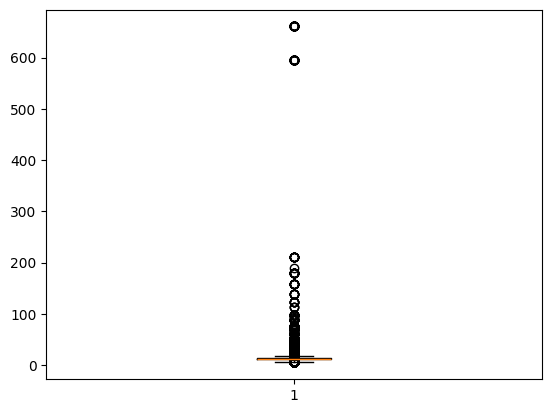

In [7]:
# outliers
fig, axis = plt.subplots()
axis.boxplot(df2['Price'])
plt.show()


In [8]:
df2[df2['Price'] > 500]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
107641,573905,11/1/2019,22655,Vintage Red Kitchen Cabinet,594.50,1,16971.0,United Kingdom
119799,572911,10/26/2019,22655,Vintage Red Kitchen Cabinet,594.50,2,16345.0,United Kingdom
127077,572281,10/23/2019,22655,Vintage Red Kitchen Cabinet,594.50,1,17211.0,United Kingdom
146014,570827,10/12/2019,22656,Vintage Blue Kitchen Cabinet,594.50,1,15831.0,United Kingdom
184771,567868,9/22/2019,22655,Vintage Red Kitchen Cabinet,594.50,2,17603.0,United Kingdom
...,...,...,...,...,...,...,...,...
504197,539044,12/15/2018,22656,Vintage Blue Kitchen Cabinet,660.62,2,15727.0,United Kingdom
504198,539044,12/15/2018,22655,Vintage Red Kitchen Cabinet,660.62,2,15727.0,United Kingdom
507609,538662,12/13/2018,22655,Vintage Red Kitchen Cabinet,660.62,2,15159.0,United Kingdom
507610,538662,12/13/2018,22656,Vintage Blue Kitchen Cabinet,660.62,2,15159.0,United Kingdom


In [9]:
df2['Price'].describe()

count    536295.000000
mean         12.662031
std           8.490638
min           5.130000
25%          10.990000
50%          11.940000
75%          14.090000
max         660.620000
Name: Price, dtype: float64

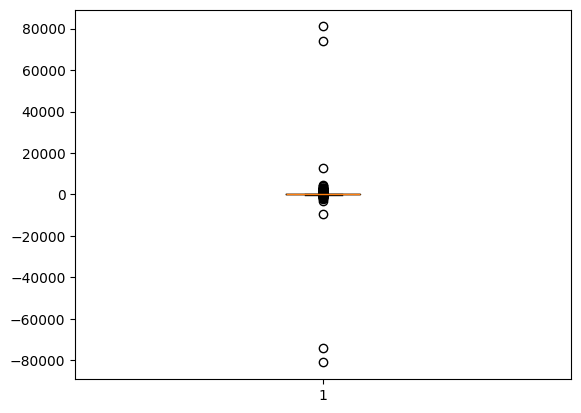

In [10]:
# quantity outlier
fig, axes = plt.subplots()

axes.boxplot(df2['Quantity'])
plt.show()


In [11]:
df2[df2['Quantity'] > 60000]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
142,581483,12/9/2019,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom
473985,541431,1/18/2019,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom


In [12]:
canceled_sales = df2[df2['TransactionNo'].str.startswith('C')]
canceled_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [13]:
filtered_values = df2['Quantity'] < 20000
df_filtered = df2[filtered_values]
df_filtered

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


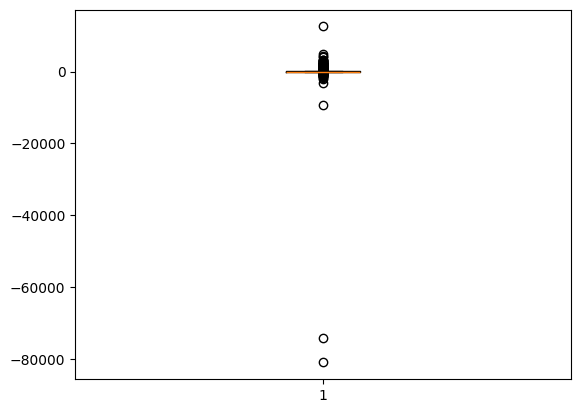

In [14]:
fig, axes = plt.subplots()
axes.boxplot(df_filtered['Quantity'])
plt.show()

In [15]:
filter2 = df_filtered['Quantity'] > 0
df_filtered = df_filtered[filter2]
df_filtered

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom


I decided to remove canceled sales and outlier values in the quantity column

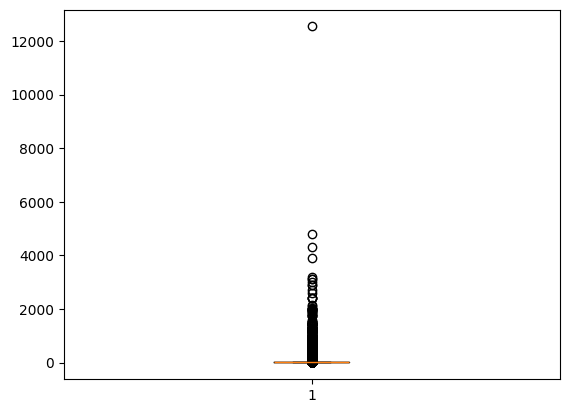

In [16]:
fig, axes = plt.subplots()
axes.boxplot(df_filtered['Quantity'])
plt.show()

In [17]:
df_filtered.describe()

,Price,Quantity,CustomerNo
count,527762.000000,527762.000000,527762.000000
mean,12.629643,10.300628,15231.629899
std,7.933239,41.494810,1716.520024
min,5.130000,1.000000,12004.000000
25%,10.990000,1.000000,13813.000000
50%,11.940000,3.000000,15159.000000
75%,14.090000,11.000000,16729.000000
max,660.620000,12540.000000,18287.000000


- 75% customers purchased between 1 and 11 units

## Duplicated values

In [18]:
df_filtered['TransactionNo'].value_counts()

TransactionNo
573585    1111
581219     747
581492     730
580729     720
558475     704
          ... 
539989       1
556249       1
539987       1
571008       1
536585       1
Name: count, Length: 19787, dtype: int64

In [19]:
df_filtered[df_filtered['TransactionNo'] == '573585']

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
109414,573585,10/31/2019,21258,Victorian Sewing Box Large,35.83,2,14585.0,United Kingdom
109415,573585,10/31/2019,22282,12 Egg House Painted Wood,35.83,2,14585.0,United Kingdom
109416,573585,10/31/2019,22423,Regency Cakestand 3 Tier,35.83,6,14585.0,United Kingdom
109417,573585,10/31/2019,22424,Enamel Bread Bin Cream,35.83,3,14585.0,United Kingdom
109418,573585,10/31/2019,22605,Wooden Croquet Garden Set,35.83,1,14585.0,United Kingdom
...,...,...,...,...,...,...,...,...
112476,573585,10/31/2019,22821,Gift Bag Psychedelic Apples,5.55,5,14585.0,United Kingdom
112477,573585,10/31/2019,23373,Vintage Christmas Paper Gift Bag,5.96,3,14585.0,United Kingdom
112478,573585,10/31/2019,23375,50'S Christmas Paper Gift Bag,5.96,5,14585.0,United Kingdom
112479,573585,10/31/2019,23436,Vintage Christmas Gift Bag Large,6.39,3,14585.0,United Kingdom


- the same sales

# Data exploration

In [20]:
df_sales = df_filtered.copy() 

In [21]:
df_sales.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [22]:
df_sales.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom
536324,536597,12/1/2018,22220,Cake Stand Lovebird 2 Tier White,20.45,1,18011.0,United Kingdom


## Sales

In [23]:
df_sales['sales'] = df_sales['Price'] * df_sales['Quantity']
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,sales
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536320,536585,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90
536321,536590,12/1/2018,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45
536322,536590,12/1/2018,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90
536323,536591,12/1/2018,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45


In [24]:
pd.to_datetime(df_sales['Date'])

0        2019-12-09
1        2019-12-09
2        2019-12-09
3        2019-12-09
4        2019-12-09
            ...    
536320   2018-12-01
536321   2018-12-01
536322   2018-12-01
536323   2018-12-01
536324   2018-12-01
Name: Date, Length: 527762, dtype: datetime64[ns]

In [25]:
df_sales['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_sales.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
sales                   float64
dtype: object

In [26]:
df_sales['Month'] = df_sales['Date'].dt.month
df_sales.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,sales,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12


In [27]:
sales_by_date = df_sales.groupby('Month')[['sales']].sum().reset_index()
sales_by_date


max_sales = sales_by_date['sales'].max()
max_sales_date = sales_by_date[sales_by_date['sales'] == max_sales]['Month'].values[0]

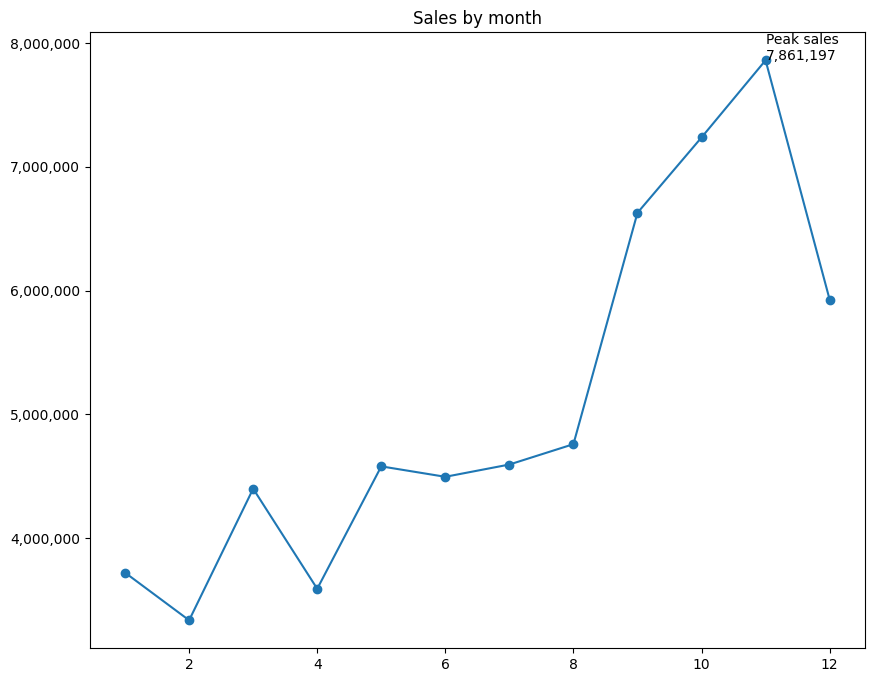

In [28]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 8))
plt.plot(sales_by_date['Month'], sales_by_date['sales'], marker='o')
plt.title('Sales by month')


def format_func(value, tick_number):
    return f'{int(value):,.0f}' # Return int value

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))


#peak sales
plt.annotate(
    'Peak sales\n' + f'{max_sales:,.0f}',
    xy=(max_sales_date, max_sales), # peak
    xytext=(max_sales_date, max_sales * 1) #text position
    # arrowprops=dict(facecolor='red', arrowstyle='->'),
    # ha='center'
)


plt.show()

- Peak sales in November reached $7,861,197 in sales;
- Top sales months: November, October, September, and December

## Products

In [29]:
len(list(df_sales['ProductName'].unique()))

3752

In [30]:
sales_by_product = df_sales.groupby('ProductName')[['sales']].sum().reset_index()
sales_by_product = sales_by_product.sort_values('sales', ascending=False)
sales_by_product


,ProductName,sales
2480,Popcorn Holder,587433.94
3669,World War 2 Gliders Asstd Designs,569735.39
825,Cream Hanging Heart T-Light Holder,484592.69
203,Assorted Colour Bird Ornament,421318.74
2157,Pack Of 72 Retrospot Cake Cases,391485.03
...,...,...
2115,Pack 4 Flower/Butterfly Patches,11.53
2315,Pink Crystal Guitar Phone Charm,11.12
1546,Hen House W Chick In Nest,10.68
836,Crochet Lilac/Red Bear Keyring,6.19


In [31]:
top_5_products = sales_by_product.head(5)
top_5_products

,ProductName,sales
2480,Popcorn Holder,587433.94
3669,World War 2 Gliders Asstd Designs,569735.39
825,Cream Hanging Heart T-Light Holder,484592.69
203,Assorted Colour Bird Ornament,421318.74
2157,Pack Of 72 Retrospot Cake Cases,391485.03


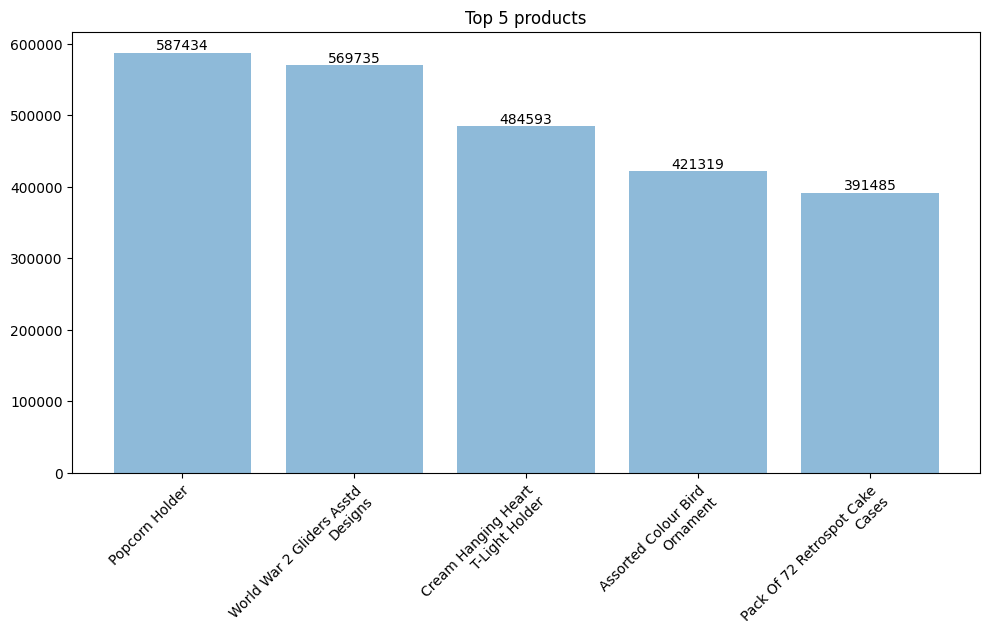

In [32]:
plt.figure(figsize=(10, 6))

bar = plt.bar(top_5_products['ProductName'], top_5_products['sales'], alpha=.5)
plt.bar_label(bar)
plt.xticks(rotation=45, ha='right', fontsize=10, wrap=True)
plt.title('Top 5 products')
plt.tight_layout()
plt.show()

## Profitable segment

In [33]:
df_sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,sales,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12
...,...,...,...,...,...,...,...,...,...,...
536320,536585,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,2,17460.0,United Kingdom,40.90,12
536321,536590,2018-12-01,22776,Sweetheart 3 Tier Cake Stand,20.45,1,13065.0,United Kingdom,20.45,12
536322,536590,2018-12-01,22622,Box Of Vintage Alphabet Blocks,20.45,2,13065.0,United Kingdom,40.90,12
536323,536591,2018-12-01,37449,Ceramic Cake Stand + Hanging Cakes,20.45,1,14606.0,United Kingdom,20.45,12


In [34]:
demographic_segment = df_sales.groupby('Country')[['sales']].sum().reset_index()
demographic_segment = demographic_segment.sort_values('sales' ,ascending=False)
demographic_segment

,Country,sales
36,United Kingdom,50681744.57
24,Netherlands,2151553.59
10,EIRE,1713410.95
14,Germany,1371543.27
13,France,1330652.89
0,Australia,995607.91
32,Sweden,401879.89
33,Switzerland,361969.25
20,Japan,293155.44
31,Spain,281012.27


In [35]:
top_5_regions_by_sales = demographic_segment.head(5)

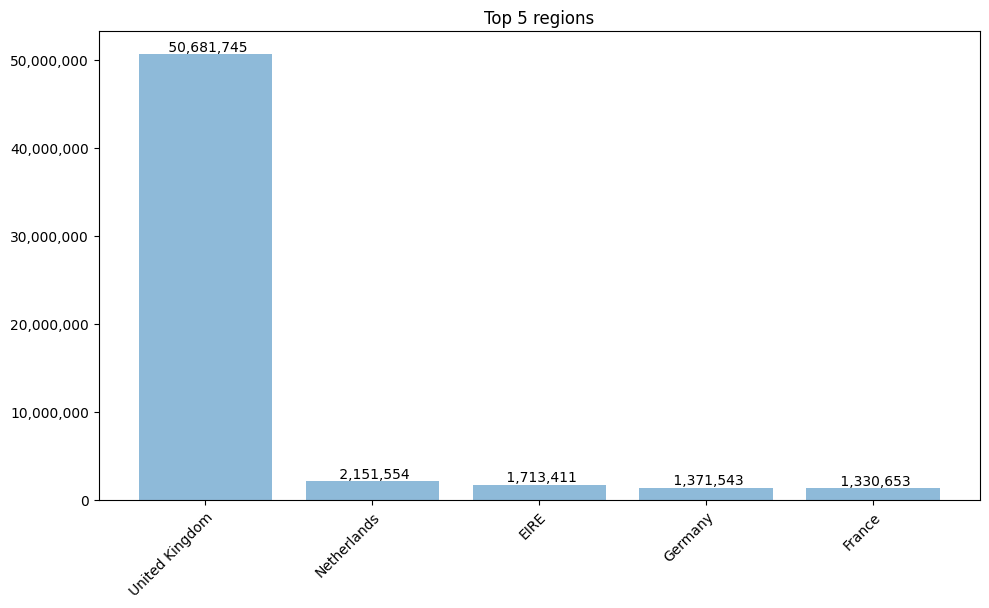

In [36]:
plt.figure(figsize=(10, 6))

bars = plt.bar(top_5_regions_by_sales['Country'], top_5_regions_by_sales['sales'], alpha=.5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval: ,.0f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right', fontsize=10, wrap=True)
plt.title('Top 5 regions')
plt.tight_layout()
plt.show()

Question:

Based on your findings, what strategy could you recommend to the business to gain more profit?

- Focus on the clients from the United Kingdom ant the other top 4, (Netherlands, EIRE, Germany, and France);
- Focus on Marketing the top 5 products;
- Understand the customer profile in the top regions and try to find the same profile in other regions.